  **PROJECT :** SentinelNet-AI-Powered Network Intrusion
Detection System (NIDS)


**Project Statement:** The project aims to build an AI-powered Network Intrusion Detection System (NIDS) that can automatically detect and classify network traffic as normal or malicious.
Using machine learning, the system will analyze network data, extract key features, train models, and raise alerts whenever suspicious activity or a possible cyber-attack is detected.

**Dataset :** CICIDS2017 Dataset: https://www.unb.ca/cic/datasets/ids-2017.html

**Using Encoded Dataset :** /content/drive/MyDrive/AI Sentinet Project/Encoded_wednesday.csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Milestone 2**

**Week 3 :** Feature Engineering + PCA + Feature Importance

**Loading Required Libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


**Load the Dataset**

In [ ]:
# Load data
import pandas as pd

# Load the encoded dataset
encoded_path = '/content/drive/MyDrive/AI Sentinet Project/Encoded_wednesday.csv'
df = pd.read_csv(encoded_path)

print("Shape of Encoded Dataset:", df.shape)
df.head()


Shape of Encoded Dataset: (691406, 81)


,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49459,80,6,38308,1,1,6,6.0,6,6,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,49453,389,6,479,11,5,172,326.0,79,0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,46124,88,6,1095,10,6,3150,3150.0,1575,0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,49454,389,6,15206,17,12,3452,6660.0,1313,0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,46126,88,6,1092,9,6,3150,3152.0,1575,0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


**Handle Remaining Cleaning (if needed)**

In [ ]:
# Drop duplicates
df.drop_duplicates(inplace=True)
# df.dropna(inplace=True) # This was already done in the previous cell

**Identify Target and Features**

We separate:


*   **X (features)** : input columns
*   **y (target)** : output/label column (e.g., attack or normal)

*   This helps in supervised learning since models need clear input and output data.






In [ ]:
# Split features and label (dropping non-numeric columns)
# Drop non-numeric columns before splitting
# Replace 'Label' with your actual target column name (e.g., 'Attack' or 'Label')
X = df.drop(' Label', axis=1)
y = df[' Label']

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (691406, 80)
Target shape: (691406,)


**Split the Dataset :**

*   We split the data into training (80%) and testing (20%) sets.
*   This allows us to train the model on one part and test its accuracy on unseen data.

In [ ]:
# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Feature Scaling :**



*   We use StandardScaler to standardize features (mean=0, std=1).
*   Scaling keeps all features on the same scale, which improves model performance and helps PCA work correctly.



In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Select only numeric columns before scaling
X_train_numeric = X_train.select_dtypes(include=np.number)
X_test_numeric = X_test.select_dtypes(include=np.number)

X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

print("Scaling complete.")

Scaling complete.


In [ ]:
top_10_features = X.columns[indices[:10]]
print("Top 10 Most Important Features:")
for i, feature in enumerate(top_10_features, 1):
    print(f"{i}. {feature}")

Top 10 Most Important Features:
1.  Avg Bwd Segment Size
2. Bwd Packet Length Max
3.  Max Packet Length
4.  Packet Length Std
5.  Packet Length Mean
6.  Bwd Packet Length Mean
7.  Packet Length Variance
8.  Average Packet Size
9. Init_Win_bytes_forward
10. Flow Bytes/s


**Feature Importance (Random Forest)**



*   We train a Random Forest model with n_estimators=50
*   It measures how much each feature contributes to prediction.

*   We then extract and visualize the Top 10 most important features that cause the attack.





In [ ]:
rf = RandomForestClassifier(n_estimators=50, random_state=42)
rf.fit(X_train_scaled, y_train)

importances = rf.feature_importances_
features = X.columns

feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

top_10 = feature_importance_df.head(10)
print(top_10)


                    Feature  Importance
56     Avg Bwd Segment Size    0.066569
12    Bwd Packet Length Max    0.062604
41        Max Packet Length    0.059616
14   Bwd Packet Length Mean    0.050466
44   Packet Length Variance    0.048030
43        Packet Length Std    0.045624
42       Packet Length Mean    0.045617
54      Average Packet Size    0.043708
15    Bwd Packet Length Std    0.035645
10   Fwd Packet Length Mean    0.032928


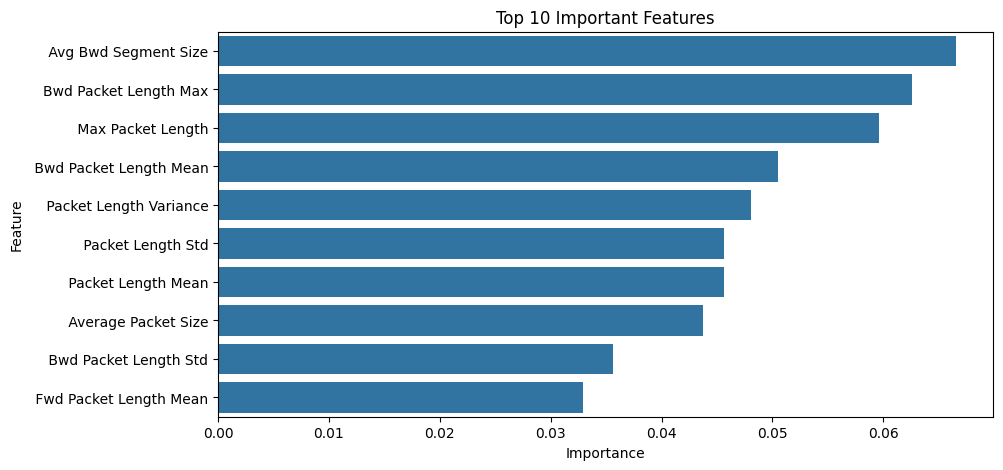

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.barplot(x='Importance', y='Feature', data=top_10)
plt.title('Top 10 Important Features')
plt.show()

**Apply PCA (Feature Reduction)**



*   We apply PCA to reduce feature dimensions into 2 main components.
*   This helps visualize high-dimensional data and check whether attack and normal data form distinct clusters.



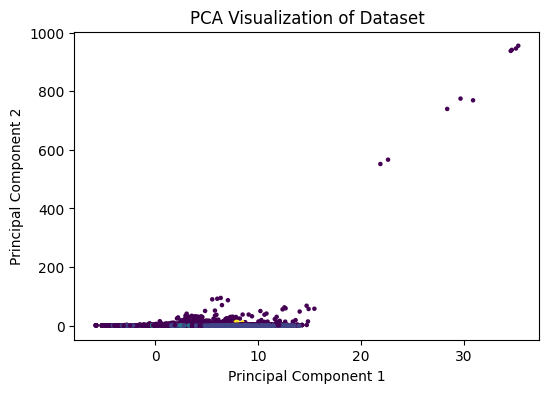

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(6,4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=pd.factorize(y_train)[0], cmap='viridis', s=5)
plt.title('PCA Visualization of Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


**Save the Results**

In [ ]:
import os

selected_features = top_10['Feature'].tolist()
df_selected = df[selected_features + [' Label']]

# Define the directory path
save_directory = "/content/drive/MyDrive/AI Sentinet Project/GeneratedLabelledFlows/CleanedData"

# Create the directory if it doesn't exist
if not os.path.exists(save_directory):
    os.makedirs(save_directory)
    print(f"Directory '{save_directory}' created.")

# Define the full file path
save_file_path = os.path.join(save_directory, "Wednesday_top10_features.csv")

# Save the DataFrame to CSV
df_selected.to_csv(save_file_path, index=False)

print(f"DataFrame saved to '{save_file_path}'")

DataFrame saved to '/content/drive/MyDrive/AI Sentinet Project/GeneratedLabelledFlows/CleanedData/Wednesday_top10_features.csv'


**Week 4 :** Supervised Model Training


**Supervised model training** means training an algorithm using input data with known output labels.
In our project, the model learns from historical network traffic labeled as **“Normal”** or **“Attack”** so it can correctly classify new, unseen network flows during testing.

**1. Train Models : Random Forest, SVM, and Logistic Regression**

**Import Libraries :**



*   **pandas :** for data handling and analysis.

*   **train_test_split :** to divide data into training and testing parts.

*   **StandardScaler :** to scale numerical values.
*   **RandomForestClassifier, SVC, LogisticRegression :** machine learning models used for training.


*   **accuracy_score, classification_report, confusion_matrix :** to evaluate how well models perform.



In [ ]:
# Basic libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ML models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


**Load Your Encoded Dataset**

Here, we load the **encoded dataset** that has already been cleaned and preprocessed.
The dataset contains **features** (like flow duration, packet length, bytes, etc.) and the label column, which tells us whether the traffic is *Normal* or an *Attack*.

In [ ]:
# Load encoded data
df = pd.read_csv('/content/drive/MyDrive/AI Sentinet Project/Encoded_wednesday.csv')

# Separate features (X) and labels (y)
X = df.drop(' Label', axis=1)
y = df[' Label']


**Split Data into Train and Test**

We split the data into two parts :

*   **Training set (80%) —** used to teach the model the relationship between features and labels.
*   **Testing set (20%) —** used to check how well the model performs on unseen data.



Using **random_state=42** ensures that the split is **reproducible**, meaning you get the same results every time you run it.
This step helps prevent overfitting and gives a fair evaluation of the model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Scale Features**

Scaling ensures that all features have similar ranges.
Some models like **SVM** and **Logistic Regression** are sensitive to feature magnitudes, so scaling helps improve their performance and stability.

We use **StandardScaler**, which converts features to have :

*   Mean = 0
*   Standard Deviation = 1



This helps the model train faster and more accurately.

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Train Random Forest Classifier**

**Random Forest** is an ensemble learning algorithm that builds multiple decision trees and combines their predictions for better accuracy and stability.

*   We use **n_estimators=50** (number of trees) and **random_state=42**

*   The model learns complex relationships between the input features and the output label.
*  After training, it predicts on test data to evaluate performance.



This model is usually strong, handles large datasets well, and doesn’t require feature scaling.

In [ ]:
# Initialize Random Forest model
rf = RandomForestClassifier(n_estimators=50, random_state=42)

# Train
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate
print("🌲 Random Forest Results 🌲")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


🌲 Random Forest Results 🌲
Accuracy: 0.999341924473178

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     87883
           1       1.00      1.00      1.00      2107
           2       1.00      1.00      1.00     46042
           3       1.00      0.99      0.99      1096
           4       0.99      1.00      1.00      1152
           5       1.00      1.00      1.00         2

    accuracy                           1.00    138282
   macro avg       1.00      1.00      1.00    138282
weighted avg       1.00      1.00      1.00    138282


Confusion Matrix:
 [[87844     0    37     2     0     0]
 [    4  2100     2     1     0     0]
 [   27     2 46013     0     0     0]
 [    4     1     0  1085     6     0]
 [    2     0     1     2  1147     0]
 [    0     0     0     0     0     2]]


**Train Support Vector Machine (SVM)**



*   Support Vector Machine (SVM) tries to find the best line or boundary (hyperplane) that separates classes (Normal vs Attack).

*   We use the RBF kernel, which allows the model to learn even non-linear boundaries in the data.
*   However, SVM needs scaled features to perform well since it depends on distance calculations between points.


*   After training, we test it on unseen data and check accuracy and confusion matrix results.



In [ ]:
# Initialize SVM (LinearSVC is much faster for large datasets)
# Take only 10,000 rows for training (adjust as needed)
X_train_sample = X_train_scaled[:10000]
y_train_sample = y_train[:10000]

from sklearn.svm import LinearSVC
svm = LinearSVC(max_iter=5000, random_state=42)
svm.fit(X_train_sample, y_train_sample)

y_pred_svm = svm.predict(X_test_scaled)

print("⚙️ LinearSVC (Sampled Data) Results ⚙️")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))







⚙️ LinearSVC (Sampled Data) Results ⚙️
Accuracy: 0.9835987330238208

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     87883
           1       0.98      0.92      0.95      2107
           2       0.97      0.99      0.98     46042
           3       0.85      0.88      0.86      1096
           4       0.96      0.78      0.86      1152
           5       0.13      1.00      0.24         2

    accuracy                           0.98    138282
   macro avg       0.81      0.93      0.81    138282
weighted avg       0.98      0.98      0.98    138282


Confusion Matrix:
 [[86572    31  1176    75    19    10]
 [  131  1944    21     9     2     0]
 [  390     9 45642     0     0     1]
 [  117     2     0   961    16     0]
 [  172     0     1    84   893     2]
 [    0     0     0     0     0     2]]


**Train Logistic Regression**



*   Logistic Regression is a linear model that estimates probabilities using a **sigmoid function** to classify data.

*   It’s simple, fast, and interpretable — making it a good **baseline model** for comparison.
Scaling helps the model converge faster and perform better.
*   After training, we test its predictions and print out evaluation metrics such as accuracy and classification report.



In [ ]:
# Initialize Logistic Regression model
lr = LogisticRegression(max_iter=1000, random_state=42)

# Train
lr.fit(X_train_scaled, y_train)

# Predict
y_pred_lr = lr.predict(X_test_scaled)

# Evaluate
print("🔹 Logistic Regression Results 🔹")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


🔹 Logistic Regression Results 🔹
Accuracy: 0.9897745187370736

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     87883
           1       0.99      0.93      0.96      2107
           2       0.98      1.00      0.99     46042
           3       0.95      0.96      0.95      1096
           4       0.96      0.93      0.94      1152
           5       1.00      1.00      1.00         2

    accuracy                           0.99    138282
   macro avg       0.98      0.97      0.97    138282
weighted avg       0.99      0.99      0.99    138282


Confusion Matrix:
 [[86806    24   984    36    33     0]
 [  129  1957    19     1     1     0]
 [   61     1 45980     0     0     0]
 [   32     1     1  1052    10     0]
 [   58     0     1    22  1071     0]
 [    0     0     0     0     0     2]]


**Compare Model Performance**

We calculate and compare the accuracy of all three models (**Random Forest, SVM, Logistic Regression**). This helps us see :

*   Which model gives the **highest accuracy**.
*   How each performs in predicting attack and normal traffic.



**Accuracy** gives a quick measure of how many predictions were correct overall.
Whichever model achieves the best accuracy and balanced precision/recall is considered the best performer.

In [ ]:
# Store accuracies
rf_acc = accuracy_score(y_test, y_pred_rf)
svm_acc = accuracy_score(y_test, y_pred_svm)
lr_acc = accuracy_score(y_test, y_pred_lr)

# Display results
print("\n📈 Model Accuracy Comparison:")
print(f"Random Forest: {rf_acc:.4f}")
print(f"SVM: {svm_acc:.4f}")
print(f"Logistic Regression: {lr_acc:.4f}")


📈 Model Accuracy Comparison:
Random Forest: 0.9993
SVM: 0.9836
Logistic Regression: 0.9898


**Visualizing Model Performance**

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


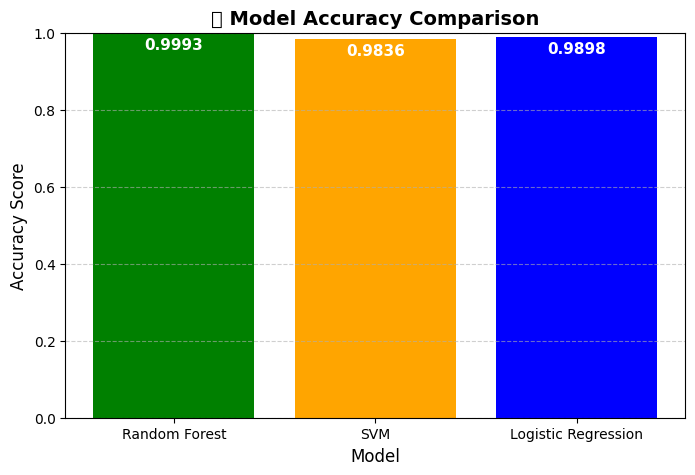

In [ ]:
# Visualize Model Performance

import matplotlib.pyplot as plt

# Accuracy scores already calculated earlier
rf_acc = accuracy_score(y_test, y_pred_rf)
svm_acc = accuracy_score(y_test, y_pred_svm)
lr_acc = accuracy_score(y_test, y_pred_lr)

# Create lists for plotting
models = ['Random Forest', 'SVM', 'Logistic Regression']
accuracies = [rf_acc, svm_acc, lr_acc]

# Plot the bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(models, accuracies, color=['green', 'orange', 'blue'])

# Add labels and title
plt.title('📊 Model Accuracy Comparison', fontsize=14, fontweight='bold')
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)
plt.ylim(0, 1)

# Annotate accuracy values on top of each bar
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() - 0.05,
             f'{acc:.4f}', ha='center', va='bottom', color='white', fontsize=11, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


**Save Trained Models**

In [ ]:
import joblib

joblib.dump(rf, '/content/drive/MyDrive/AI Sentinet Project/rf_model.pkl')
joblib.dump(svm, '/content/drive/MyDrive/AI Sentinet Project/svm_model.pkl')
joblib.dump(lr, '/content/drive/MyDrive/AI Sentinet Project/lr_model.pkl')

print("✅ Models saved successfully!")


✅ Models saved successfully!


**2. Evaluate Model Performance — Accuracy, Precision, Recall, and F1-Score**



*   After training our models, the next important step is to **evaluate their performance.**

*   This helps us understand how well each model can classify network traffic into Normal and Attack categories.
*   We use standard evaluation metrics like **Accuracy, Precision, Recall, and F1-Score to measure performance.**




**Import Required Metrics :**



*   **accuracy_score :** Measures the percentage of correct predictions.

*   **precision_score :** Checks how many of the predicted positive cases were actually positive.

*   **recall_score :** Measures how many of the actual positive cases were correctly detected.
*   **f1_score :** Balances precision and recall into a single value.


*   **classification_report :** Gives a detailed breakdown for each class (Normal vs Attack).


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


**Evaluate Each Model Separately**

In [ ]:
# Random Forest
print("🌲 RANDOM FOREST PERFORMANCE 🌲")
print("Accuracy :", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, average='weighted'))
print("Recall   :", recall_score(y_test, y_pred_rf, average='weighted'))
print("F1-Score :", f1_score(y_test, y_pred_rf, average='weighted'))
print("\nDetailed Report:\n", classification_report(y_test, y_pred_rf))


🌲 RANDOM FOREST PERFORMANCE 🌲
Accuracy : 0.999341924473178
Precision: 0.9993417848086358
Recall   : 0.999341924473178
F1-Score : 0.9993417752560435

Detailed Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     87883
           1       1.00      1.00      1.00      2107
           2       1.00      1.00      1.00     46042
           3       1.00      0.99      0.99      1096
           4       0.99      1.00      1.00      1152
           5       1.00      1.00      1.00         2

    accuracy                           1.00    138282
   macro avg       1.00      1.00      1.00    138282
weighted avg       1.00      1.00      1.00    138282



In [ ]:
# Support Vector Machine
print("⚙️ SVM PERFORMANCE ⚙️")
print("Accuracy :", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm, average='weighted'))
print("Recall   :", recall_score(y_test, y_pred_svm, average='weighted'))
print("F1-Score :", f1_score(y_test, y_pred_svm, average='weighted'))
print("\nDetailed Report:\n", classification_report(y_test, y_pred_svm))


⚙️ SVM PERFORMANCE ⚙️
Accuracy : 0.9835987330238208
Precision: 0.9837473563914059
Recall   : 0.9835987330238208
F1-Score : 0.9835426127566027

Detailed Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     87883
           1       0.98      0.92      0.95      2107
           2       0.97      0.99      0.98     46042
           3       0.85      0.88      0.86      1096
           4       0.96      0.78      0.86      1152
           5       0.13      1.00      0.24         2

    accuracy                           0.98    138282
   macro avg       0.81      0.93      0.81    138282
weighted avg       0.98      0.98      0.98    138282



In [ ]:
# Logistic Regression
print("🔹 LOGISTIC REGRESSION PERFORMANCE 🔹")
print("Accuracy :", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr, average='weighted'))
print("Recall   :", recall_score(y_test, y_pred_lr, average='weighted'))
print("F1-Score :", f1_score(y_test, y_pred_lr, average='weighted'))
print("\nDetailed Report:\n", classification_report(y_test, y_pred_lr))


🔹 LOGISTIC REGRESSION PERFORMANCE 🔹
Accuracy : 0.9897745187370736
Precision: 0.9898852976704313
Recall   : 0.9897745187370736
F1-Score : 0.9897671378507669

Detailed Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     87883
           1       0.99      0.93      0.96      2107
           2       0.98      1.00      0.99     46042
           3       0.95      0.96      0.95      1096
           4       0.96      0.93      0.94      1152
           5       1.00      1.00      1.00         2

    accuracy                           0.99    138282
   macro avg       0.98      0.97      0.97    138282
weighted avg       0.99      0.99      0.99    138282



**Compare All Models Side by Side**

**Explanation :**



*   This table (DataFrame) shows each model’s Accuracy, Precision, Recall, and F1-Score.

*   It allows for easy comparison — we can instantly see which model scores the highest on each metric.
*   A model with consistently high values across all metrics is considered the most balanced and reliable.



In [ ]:
# Calculate metrics for all models
metrics = {
    "Model": ["Random Forest", "SVM", "Logistic Regression"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_lr)
    ],
    "Precision": [
        precision_score(y_test, y_pred_rf, average='weighted'),
        precision_score(y_test, y_pred_svm, average='weighted'),
        precision_score(y_test, y_pred_lr, average='weighted')
    ],
    "Recall": [
        recall_score(y_test, y_pred_rf, average='weighted'),
        recall_score(y_test, y_pred_svm, average='weighted'),
        recall_score(y_test, y_pred_lr, average='weighted')
    ],
    "F1-Score": [
        f1_score(y_test, y_pred_rf, average='weighted'),
        f1_score(y_test, y_pred_svm, average='weighted'),
        f1_score(y_test, y_pred_lr, average='weighted')
    ]
}

# Display as a DataFrame
import pandas as pd
results_df = pd.DataFrame(metrics)
print("📊 Model Performance Comparison:")
print(results_df)


📊 Model Performance Comparison:
                 Model  Accuracy  Precision    Recall  F1-Score
0        Random Forest  0.999342   0.999342  0.999342  0.999342
1                  SVM  0.983599   0.983747  0.983599  0.983543
2  Logistic Regression  0.989775   0.989885  0.989775  0.989767


**Visualize Comparison :**



*   The chart visually represents how each model performs.

*   Models with taller bars (closer to 1.0) are performing better.
*   This visualization makes the evaluation results easy to interpret at a glance.



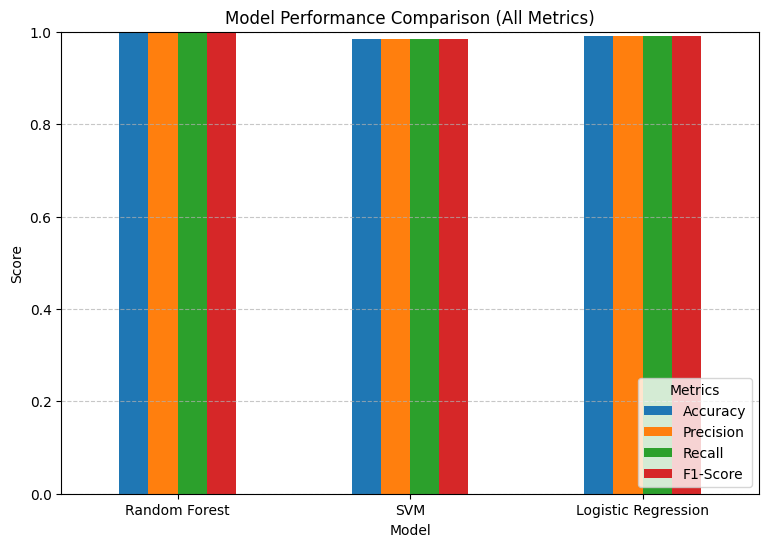

In [ ]:
import matplotlib.pyplot as plt

# Plot metrics side by side
results_df.plot(x='Model', kind='bar', figsize=(9,6), title='Model Performance Comparison (All Metrics)')
plt.xticks(rotation=0)
plt.ylabel('Score')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Metrics', loc='lower right')
plt.show()


**Save the Model performance results**

In [ ]:
results_df.to_csv('/content/drive/MyDrive/AI Sentinet Project/model_performance_results.csv', index=False)
print("✅ Model performance results saved successfully!")


✅ Model performance results saved successfully!
